# Here I will be making a Neural Network from scratch for classifying the MNIST images dataset

# This won't be as good as the many other sources available for making your own neural net in python but will be a useful reference for me

# First load in the data

In [1]:
from mnist import MNIST

mnist = MNIST('./dataset/')
x_train, y_train = mnist.load_training() #60000 samples
x_test, y_test = mnist.load_testing()    #10000 samples

In [2]:
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.int32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.int32)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
from matplotlib import pyplot as plt

print(y_train[0])


plt.imshow(x_train[0,:].reshape((28,28)))
plt.show()

5


<Figure size 640x480 with 1 Axes>

# So we can see each image has 784 pixels, so our first layer must have 784 nodes, and as there are 10 numbers, our last layer will have 10 nodes

## Let's write a class that will be able to calculate initial weights and biases for different architectures

In [5]:
#sizes will be a list of the sizes of each layer, 
#for this case to work you would want the first entry to be 784 and the last entry to be 10

class Network(object):
    def __init__(self,sizes):

        self.num_layers=len(sizes)
        self.sizes=sizes
        #we want one bias for each node in our architecture (except for the input nodes)
        #[b1,b2,b3] where b1 is a vector with biases for each node in the second layer
        self.biases=[np.random.standard_normal(sizes[i+1])/255 for i in range(self.num_layers-1)]
        #we want a 2D array of weights for each layer
        #rows are number of nodes in the next layer
        #columns are number of nodes in the previouse layer
        #[w1,w2,w3] where w1 is a matrix
        self.weights=[np.random.standard_normal(size=(sizes[i+1],sizes[i]))/255 for i in range(self.num_layers-1)]
        


In [6]:
Network([784,32,16,10])

# We'll make a function for calculating the values of the nodes in our array
For any individual node, its value is the sum of all previous nodes multiplied by their respective weights, plus the bias for that node. We'll also use ReLu activation. Our last layer will need softmax activation so it can output the probability of each class

In [7]:
class Network(object):
    def __init__(self,sizes):

        self.num_layers=len(sizes)
        self.sizes=sizes
        #we want one bias for each node in our architecture (except for the input nodes)
        #[b1,b2,b3] where b1 is a vector with biases for each node in the second layer
        self.biases=[np.random.standard_normal(sizes[i+1])/255 for i in range(self.num_layers-1)]
        #we want a 2D array of weights for each layer
        #rows are number of nodes in the next layer
        #columns are number of nodes in the previouse layer
        #[w1,w2,w3] where w1 is a matrix
        self.weights=[np.random.standard_normal(size=(sizes[i+1],sizes[i]))/255 for i in range(self.num_layers-1)]   
    
    def calculate_nodes(self,index):
        #index is the index of our input image
        input_nodes=x_train[index,:]/255 #scale so its range is [0,1]
        
        #nodes will be a nested list, each entry will contain a vector with all of 
        #the node values for that subsequent layer
        nodes=[]

        for i in range(self.num_layers-1):
            
            #The first hidden layer will need to do a matrix multiplication using the input node
            #It will have ReLu activation 
            if i==0:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[0],input_nodes.reshape((self.sizes[0],1)))
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[0])]
                
                n=self.ReLu(potential)
                
                nodes.append(n)

                
                
            #layers in the middle will take the previous layer's nodes for the matmul
            #they will also have ReLu activation
            elif i<self.num_layers-2:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[i],nodes[i-1].reshape((self.sizes[i],1)))
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[i])]
                
                n=self.ReLu(potential)
                
                nodes.append(n)
                        
            
            #the last layer will take the previous layer's nodes for the matmul
            #it will have a softmax activation
            else:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[i],nodes[i-1].reshape((self.sizes[i],1)))
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[i])]
                
                n=self.softmax(potential)
                
                nodes.append(n)
                
        return nodes
                
                
    def ReLu(self,vector):
        #return itself if positive, return 0 if negative
        n=np.asarray(vector)
        
        for i in range(len(n)):
            n[i]=max(0,n[i])
            
        return n
    
    def softmax(self,vector):
        
        node_vector=np.asarray(vector)

        val=np.zeros(len(node_vector))

        node_sum=np.sum(np.exp(node_vector))

        for i in range(len(node_vector)):
            val[i]=(np.exp(node_vector[i]))/node_sum

        return val
        
    
                
obj=Network([784,30,10])
nodes=obj.calculate_nodes(0)
    

# Let's make a function that plots the nodes in an easy to visualize way

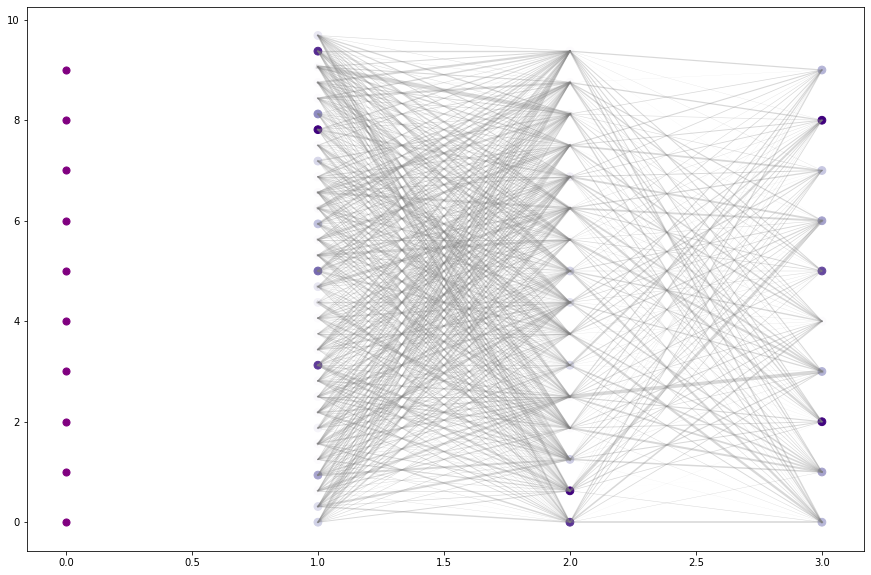

In [8]:
from matplotlib import pyplot as plt

class Network(object):
    def __init__(self,sizes):

        self.num_layers=len(sizes)
        self.sizes=sizes
        #we want one bias for each node in our architecture (except for the input nodes)
        #[b1,b2,b3] where b1 is a vector with biases for each node in the second layer
        self.biases=[np.random.standard_normal(sizes[i+1])/255 for i in range(self.num_layers-1)]
        #we want a 2D array of weights for each layer
        #rows are number of nodes in the next layer
        #columns are number of nodes in the previouse layer
        #[w1,w2,w3] where w1 is a matrix
        self.weights=[np.random.standard_normal(size=(sizes[i+1],sizes[i]))/255 for i in range(self.num_layers-1)]   
    
    def calculate_nodes(self,index):
        #index is the index of our input image
        input_nodes=x_train[index,:]/255 #scale so its range is [0,1]
        
        #nodes will be a nested list, each entry will contain a vector with all of 
        #the node values for that subsequent layer
        nodes=[]

        for i in range(self.num_layers-1):
            
            #The first hidden layer will need to do a matrix multiplication using the input node
            #It will have ReLu activation 
            if i==0:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[0],input_nodes.reshape((self.sizes[0],1)))
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[0])]
                
                n=self.ReLu(potential)
                
                nodes.append(n)

                
                
            #layers in the middle will take the previous layer's nodes for the matmul
            #they will also have ReLu activation
            elif i<self.num_layers-2:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[i],nodes[i-1].reshape((self.sizes[i],1)))
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[i])]
                
                n=self.ReLu(potential)
                
                nodes.append(n)
                        
            
            #the last layer will take the previous layer's nodes for the matmul
            #it will have a softmax activation
            else:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[i],nodes[i-1].reshape((self.sizes[i],1)))
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[i])]
                
                n=self.softmax(potential)
                
                nodes.append(n)
                
        return nodes
                
                
    def ReLu(self,vector):
        #return itself if positive, return 0 if negative
        n=np.asarray(vector)
        
        for i in range(len(n)):
            n[i]=max(0,n[i])
            
        return n
    
    def softmax(self,vector):
        
        node_vector=np.asarray(vector)

        val=np.zeros(len(node_vector))

        node_sum=np.sum(np.exp(node_vector))

        for i in range(len(node_vector)):
            val[i]=(np.exp(node_vector[i]))/node_sum

        return val
    
    
    def visualizer(self,index):
        
        plt.figure(figsize=(15,10))
        
        input_nodes=x_train[index,:]/255
        nodes=self.calculate_nodes(index)
        
        
        for i in range(self.num_layers):
            
            if i==0:
                #plotting the input array, this won't be colored by the value within
                #we'll try and plot our input array, but if it is prohibitively large we'll just plot a placeholder
                
                if self.sizes[0]>50:
                    #the input array is too large to plot all of it
                    plot_input_connections=False
                    
                    x=[0,0,0,0,0,0,0,0,0,0]
                    y=[0,1,2,3,4,5,6,7,8,9]
                    
                    plt.scatter(x,y,s=50,c='purple')
                    
                else:
                    #the input array is small enough to plot
                    plot_input_connections=True
                    
                    x=[]
                    y=[]
                    for j in range(self.sizes[0]):
                        x.append(0)
                        y.append(j*(10/self.sizes[0]))
                        
                    plt.scatter(x,y,s=50,c='purple')
                    
                #plot weights for the connection between the input layer and the first hidden layer
                if plot_input_connections:
                    
                    #y values for first hidden layer
                    y_h=[j*(10/self.sizes[1]) for j in range(self.sizes[1])]
                    
                    for j in range(self.sizes[0]):
                        for k in range(self.sizes[1]):
                            x_w=[0,2]
                            y_w=[y[j],y_h[k]]
                            plt.plot(x_w,y_w,lw=self.weights[0][k,j]*255,c='gray',alpha=0.3)
                            
                            
            else:

                #all layers after the input array
                
                x=[]
                y=[]
                for j in range(self.sizes[i]):
                    x.append(i)
                    y.append(j*(10/self.sizes[i]))
                    
                try:
                    c=[nodes[i-1][j][0] for j in range(self.sizes[i])]
                except:
                    c=[nodes[i-1][j] for j in range(self.sizes[i])]

                    
                plt.scatter(x,y,c=c,cmap='Purples',s=60)
                
                #plot weights
                if i<self.num_layers-1:
                    
                    y_h=[j*(10/self.sizes[i+1]) for j in range(self.sizes[i+1])]
                
                    for j in range(self.sizes[i]):
                        for k in range(self.sizes[i+1]):
                            x_w=[i,i+1]
                            y_w=[y[j],y_h[k]]

                            plt.plot(x_w,y_w,lw=self.weights[i][k,j]*255,c='gray',alpha=0.3)
                    
                    
                    
            
                    
        plt.show()
                        
                
obj=Network([784,32,16,10])
obj.visualizer(45)
        
        

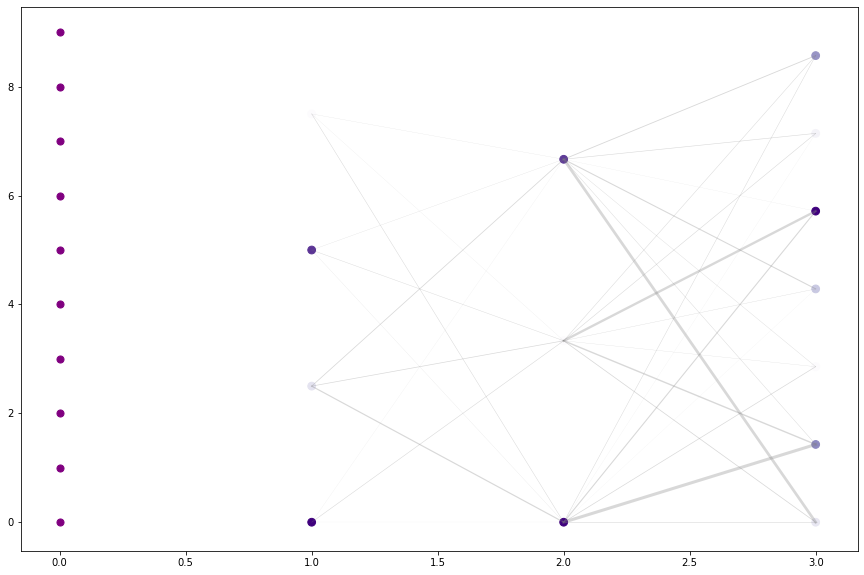

In [9]:
obj=Network([784,4,3,7])
obj.visualizer(0)

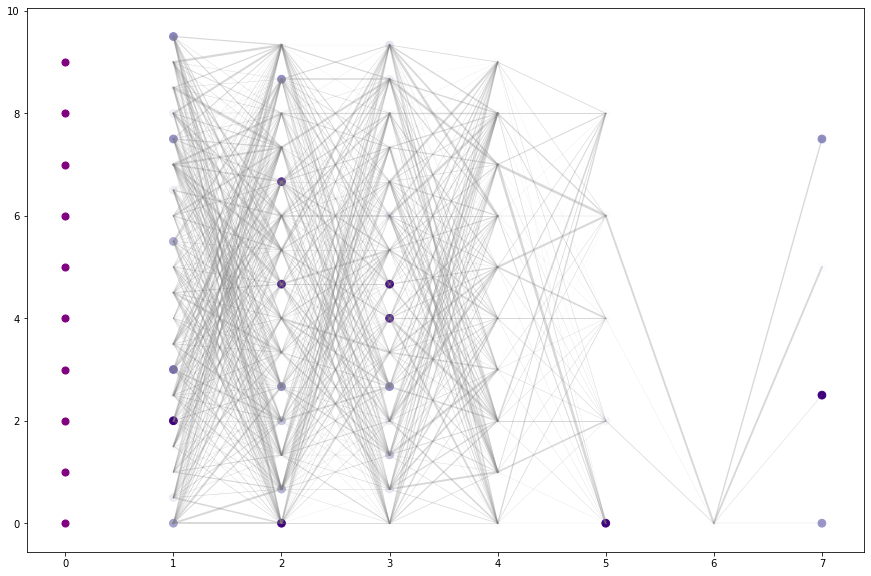

In [10]:
obj=Network([784,20,15,15,10,5,1,4])
obj.visualizer(0)

# The next thing we'll do is try to create a backpropogation function for training

### This is complicated, let's first create a test example where we backpropogate for a network with 1 input node, 1 hidden layer with 1 node, and an output layer with 1 node, for a batch of 1 image with 1 pixel

Our cost function is given by

$$C_0(...)=(a^{(L)}-y)^2$$

where y is the desired output, and $a^{(L)}$ is the actual final output

We can express $a^{(L)}$ in terms of the weighted sum and sigmoid function

$$z^{(L)}=w^{(L)}a^{(L-1)}+b^{(L)}$$

$$a^{(L)}=\sigma (z^{(L)})$$

Where the sigmoid is given by

$$\sigma (z^{(L)})=\frac{1}{1+e^{-z^{(L)}}}$$

We want the partial derivative of the cost function with respect to the things we can change, the weights and biases. First we'll do the weights. We can use the chain rule to express this partial derivative in terms of calculable quantities

$$\frac{\partial C_0}{\partial w^{(L)}}=\frac{\partial z^{(L)}}{\partial w^{(L)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}}$$

$$\frac{\partial C_0}{\partial a^{(L)}}=2(a^{(L)}-y)$$

$$\frac{\partial a^{(L)}}{\partial z^{(L)}}=\sigma '(z^{(L)})=\sigma(z^{(L)})(1-\sigma (z^{(L)}))$$

$$ \frac{\partial z^{(L)}}{\partial w^{(L)}}=a^{(L-1)} $$


Next we can do the biases

$$\frac{\partial C_0}{\partial b^{(L)}}= \frac{\partial z^{(L)}}{\partial b^{(L)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}}$$

The only new partial derivative is 

$$\frac{\partial z^{(L)}}{\partial b^{(L)}}=1$$


Our stochastic gradient is the vector with the partial cost functions for each weight and bias

$$\nabla C_0 = [\frac{\partial C_0}{\partial w^{(1)}}, \frac{\partial C_0}{\partial b^{(1)}}, \frac{\partial C_0}{\partial w^{(2)}}, \frac{\partial C_0}{\partial b^{(2)}}  ]$$

In [11]:
def sigmoid(inpt):
    return(1./(1+np.exp(-inpt)))

def sigmoid_prime(inpt):
    sigma=sigmoid(inpt)
    
    return(sigma*(1-sigma))
    


In [12]:
# let's say for this test case the neuron should fire, so the desired output is 1

input_pixel=0.6
y=1

w1=np.random.standard_normal()
b1=np.random.standard_normal()
w2=np.random.standard_normal()
b2=np.random.standard_normal()

hidden1=sigmoid(input_pixel*w1+b1)
output=sigmoid(hidden1*w2+b2)

print("hidden node's value is "+str(hidden1)[:5])
print("output is "+str(output)[:5])
print("distance from desired output is "+str(y-output)[:5])
print("the cost is "+str((output-y)**2)[:5])

z2=w2*hidden1+b2

#let's calculate the partial derivative for the weight leading to our output

partialC_w2=hidden1*sigmoid_prime(z2)*2*(output-y)
print("gradient for second weight is "+str(partialC_w2)[:6])

#next the partial derivative for the bias on our output

partialC_b2=1*sigmoid_prime(z2)*2*(output-y)
print("gradient for second bias is "+str(partialC_b2)[:6])



hidden node's value is 0.124
output is 0.393
distance from desired output is 0.606
the cost is 0.367
gradient for second weight is -0.036
gradient for second bias is -0.289


# Now to backpropogate we need the gradient of the previous layer

$$ \frac{\partial C_0}{\partial a^{(L-1)}} = \frac{\partial z^{(L)}}{\partial a^{(L-1)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}} $$

The only new partial derivative is 

$$\frac{\partial z^{(L)}}{\partial a^{(L-1)}}=w^{(L)}$$

In [13]:
partialC_hidden1=w2*sigmoid_prime(z2)*2*(output-y)
print("gradient of the hidden layer is "+str(partialC_hidden1)[:6])

gradient of the hidden layer is 0.2772


# Now we continue propogating backwards with the chain rule

first our weight

$$\frac{\partial C_0}{\partial w^{(L-1)}} = \frac{\partial z^{(L-1)}}{\partial w^{(L-1)}} \frac{\partial a^{(L-1)}}{\partial z^{(L-1)}} \frac{\partial z^{(L)}}{\partial a^{(L-1)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}}$$ 

which we can simplify as

$$\frac{\partial C_0}{\partial w^{(L-1)}} = \frac{\partial z^{(L-1)}}{\partial w^{(L-1)}} \frac{\partial a^{(L-1)}}{\partial z^{(L-1)}} \frac{\partial C_0}{\partial a^{(L-1)}} $$ 

next our bias

$$\frac{\partial C_0}{\partial b^{(L-1)}} = \frac{\partial z^{(L-1)}}{\partial b^{(L-1)}} \frac{\partial a^{(L-1)}}{\partial z^{(L-1)}} \frac{\partial z^{(L)}}{\partial a^{(L-1)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}}$$ 

again simplified to be

$$\frac{\partial C_0}{\partial b^{(L-1)}} = \frac{\partial z^{(L-1)}}{\partial b^{(L-1)}} \frac{\partial a^{(L-1)}}{\partial z^{(L-1)}} \frac{\partial C_0}{\partial a^{(L-1)}} $$ 


And there are no new terms here, just the same partial derivatives moved back a layer

In [14]:
z1=w1*input_pixel+b1

partialC_w1=input_pixel*sigmoid_prime(z1)*partialC_hidden1
print("gradient of the first weight is "+str(partialC_w1)[:6])

partialC_b1=1*input_pixel*partialC_hidden1
print("gradient of the first bias is "+str(partialC_b1)[:6])

gradient of the first weight is 0.0181
gradient of the first bias is 0.1663


# There it is, we've calculated the simplest backpropogation possible

adding one layer of complexity, we have to sum over all of the images in our batch

$$ \frac{\partial C}{\partial w^{(L)}} = \frac{1}{n} \sum_{k=0}^{n-1} \frac{\partial C_k}{\partial w^{(L)}} $$

$$ \frac{\partial C}{\partial b^{(L)}} = \frac{1}{n} \sum_{k=0}^{n-1} \frac{\partial C_k}{\partial b^{(L)}}  $$

In [24]:
#here our image will still only be 1 pixel, but we'll have multiple images
#here output should be 1 if input > 0.5
input_pixels=[0.7,0.6,0.1,0.2,0.8,0.3,0.6,0.4,0.3,0.8,0.1,0.6,0.2,0.3,0.4,0.9,0.3,0.7,0.1,0.6,0.1,0.2,0.3]
true_outputs=[1,1,0,0,1,0,1 ,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0]

#we'll start making our weights and biases the appropriate lists
weights=[np.random.standard_normal(),np.random.standard_normal()]
biases=[np.random.standard_normal(),np.random.standard_normal()]

#here's where we'll calculate gradients, for each iteration we'll add to the gradient value
partial_weights=[0,0]
partial_biases=[0,0]

n=len(input_pixels)

for i in range(n):
    #input
    inpt=input_pixels[i]
    true=true_outputs[i]
    
    #calculate nodes
    z1=weights[0]*inpt+biases[0]
    hidden1=sigmoid(z1)
    
    z2=weights[1]*hidden1+biases[1]
    output=sigmoid(hidden1*weights[1]+biases[1])
    
    nodes=[inpt,hidden1,output]
    z=[z1,z2]
    
    #calculate cost
    cost_i=(output-true)**2
    
    #calculate gradient for weights and biases, working backwards
    #first we calculate partial C/partial a
    node_partial=[0,0]
    
    node_partial[-1]=2*(output-true)
    node_partial[-2]=weights[-1]*sigmoid_prime(z[-1])*2*(output-true)
    
    for j in range(2):
        
        #calculate weight gradient at this location
        partial_w=nodes[-(j+2)] *sigmoid_prime(z[-(j+1)])*node_partial[-(j+1)]
        
        partial_weights[-(j+1)]+=partial_w
        
        #calculate bias gradient at this location
        partial_b=1*sigmoid_prime(z[-(j+1)])*node_partial[-(j+1)]
        
        partial_biases[-(j+1)]+=partial_b
        

        
        
    
print(partial_weights)
print(partial_biases)

    


[0.05665223226439278, 1.523365315715934]
[0.7391473948987367, 3.0391442422294173]


# Now what would happen if our architecture was slightly more complicated?

Here we'll try and make the backpropogation function general

In [40]:
class Network(object):
    def __init__(self,sizes):

        self.num_layers=len(sizes)
        self.sizes=sizes
        #we want one bias for each node in our architecture (except for the input nodes)
        #[b1,b2,b3] where b1 is a vector with biases for each node in the second layer
        self.biases=[np.random.standard_normal(sizes[i+1])/255 for i in range(self.num_layers-1)]
        #we want a 2D array of weights for each layer
        #rows are number of nodes in the next layer
        #columns are number of nodes in the previouse layer
        #[w1,w2,w3] where w1 is a matrix
        self.weights=[np.random.standard_normal(size=(sizes[i+1],sizes[i]))/255 for i in range(self.num_layers-1)]   
    
    def calculate_nodes(self,index):
        #index is the index of our input image
        input_nodes=x_train[index,:]/255 #scale so its range is [0,1]
        
        #nodes will be a nested list, each entry will contain a vector with all of 
        #the node values for that subsequent layer
        nodes=[]

        #z will be a nested list with the same shape as nodes(just for easier indexing)
        #it will have the values at each node before the sigmoid function is applied
        #the first entry will be 0, since there's no z for the input image
        z=[]
        
        nodes.append(input_nodes)

        for i in range(self.num_layers-1):
            
            #The first hidden layer will need to do a matrix multiplication using the input node
            if i==0:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[0],input_nodes.reshape((self.sizes[0],1)))
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[0])]
                
                n=self.sigmoid(potential)
                
                nodes.append(n)
                z.append(potential)
 
            #layers after will take the previous layer's nodes for the matmul
            else:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[i],nodes[i].reshape((self.sizes[i],1)))
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[i])]
                
                n=self.sigmoid(potential)
                
                nodes.append(n)
                z.append(potential)
                        
                
                
        #nodes has node values for all layers including the input layer
        return nodes,z
                
                
    def ReLu(self,vector):
        #return itself if positive, return 0 if negative
        #this will output an array 
        n=np.asarray(vector)
        
        for i in range(len(n)):
            n[i]=max(0,n[i])
            
        return n
    
    def softmax(self,vector):
        
        node_vector=np.asarray(vector)

        val=np.zeros(len(node_vector))

        node_sum=np.sum(np.exp(node_vector))

        for i in range(len(node_vector)):
            val[i]=(np.exp(node_vector[i]))/node_sum

        return val
    
    def sigmoid(self,inpt):
        return(1./(1+np.exp(np.negative(inpt))))

    def sigmoid_prime(self,inpt):
        sigma=sigmoid(inpt)

        return(sigma*(1-sigma))
    
    def train_on_batch(self,batch_indexes):
        #this function will use backpropogation to train on a batch of data
        #it will calculate the gradients for each weight and bias
        #once it has summed these gradients over the whole batch it will update the weights and biases of our class
        
        
        #weights is a list with length num_layers
        #each entry in the list is a 2D array with shape size[i+1]xsize[i]
        
        #biases is a list with length num_layers
        #each entry is a vector with shape size[i+1]
        
        partial_weights=[]
        partial_biases=[]
        
        #we'll start the partial biases list with a 0, so it's indexed the same way as nodes
        partial_biases.append(0)
        #we won't do this with the partial weights, since the weights are in between
        
        for i in range(self.num_layers-1):
            partial_weights.append(np.zeros((sizes[i+1],sizes[i])))
            partial_biases.append(np.zeros(sizes[i+1]))
            
        
        
        
        #sum over each image in the batch
        for i in range(len(batch_indexes)):
            
            index=batch_indexes[i]
            true_label=y_train[index]
            
            #nodes has all layers including the input layer
            #z also has all layers including the input layer (for simple indexing)
            #the first entry in z is 0, as the input layer has no z value
            nodes,z=self.calculate_nodes(index)
            

            #backpropogate, iterating over each layer
            for j in range(self.num_layers-1):
                
                #calculate bias gradient for each node in the layer
                for k in range(sizes[-(j+1)]):
                    z_val=z[-(j+1)][k]
            
            
            
obj=Network([784,10,10])
nodes,z=obj.calculate_nodes(0)
            
            

In [83]:
class Network(object):
    def __init__(self,sizes):

        self.num_layers=len(sizes)
        self.sizes=sizes
        #we want one bias for each node in our architecture (except for the input nodes)
        #[b1,b2,b3] where b1 is a vector with biases for each node in the second layer
        self.biases=[np.random.standard_normal(sizes[i+1])/255 for i in range(self.num_layers-1)]
        #we want a 2D array of weights for each layer
        #rows are number of nodes in the next layer
        #columns are number of nodes in the previouse layer
        #[w1,w2,w3] where w1 is a matrix
        self.weights=[np.random.standard_normal(size=(sizes[i+1],sizes[i]))/255 for i in range(self.num_layers-1)]   
    
    def calculate_nodes(self,index):
        #index is the index of our input image
        input_nodes=x_train[index,:]/255 #scale so its range is [0,1]
        
        #nodes will be a nested list, each entry will contain a vector with all of 
        #the node values for that subsequent layer
        nodes=[]

        for i in range(self.num_layers-1):
            
            #The first hidden layer will need to do a matrix multiplication using the input node
            #It will have ReLu activation 
            if i==0:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[0],input_nodes)
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[0])]
                
                n=self.ReLu(potential)
                
                nodes.append(n)
 
            #layers in the middle will take the previous layer's nodes for the matmul
            #they will also have ReLu activation
            elif i<self.num_layers-2:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[i],nodes[i-1])
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[i])]
                
                n=self.ReLu(potential)
                
                nodes.append(n)
                        
            
            #the last layer will take the previous layer's nodes for the matmul
            #it will have a softmax activation
            else:

                #weighted sum of the previous layer's nodes
                temp=np.matmul(self.weights[i],nodes[i-1])
                #adding the biases
                potential=[x+y for x,y in zip(temp,self.biases[i])]
                
                n=self.softmax(potential)
                
                nodes.append(n)
                
        return nodes
                
                
    def ReLu(self,vector):
        #return itself if positive, return 0 if negative
        #this will output an array 
        n=np.asarray(vector)
        
        for i in range(len(n)):
            n[i]=max(0,n[i])
            
        return n
    
    def softmax(self,vector):
        
        node_vector=np.asarray(vector)

        val=np.zeros(len(node_vector))

        node_sum=np.sum(np.exp(node_vector))

        for i in range(len(node_vector)):
            val[i]=(np.exp(node_vector[i]))/node_sum

        return val
    
    
    
    
    
obj=Network([784,10,10])
nodes=obj.calculate_nodes(0)

In [10]:
weights=[w1,w2,w3]
biases=[b1,b2,b3]

def calculate_batch_loss(batch_indexes,weights,biases):
    
    loss_sum=0
    N=len(batch_indexes)
    
    #sum over all indexes in the batch
    for i in range(N):
        index=batch_indexes[i]
        n1=x_train[index,:]/255
        true_label=y_train[index]
        
        #calculate final node values
        n2,n3,n4=calculate_nodes(n1,weights,biases)
        
        #sum over all classes
        for j in range(10):
            
            #determine if yik is 0 or 1
            if j==true_label:
                #yik=1
                
                #determine hat{yik}
                yhat=n4[j]
                
                loss_sum+=np.log2(yhat)
                
    loss=-(1./N)*loss_sum
    
    return(loss)


batch_indexes=np.arange(64)
loss=calculate_batch_loss(batch_indexes,weights,biases)
print("Loss from categorical crossentropy for {:.0f} images is ".format(len(batch_indexes))+str(loss)[:4])
        
        
        
        
    

Loss from categorical crossentropy for 64 images is 3.32


# For gradient descent in a batch of data, we use the assumption

$$\nabla C \approx \frac{1}{N}\sum_{j=1}^N \nabla C_{X_j}$$

Where N is the number of images in a batch, and $\nabla C_{X_j}$ is the gradient of the cost of 1 individual image

$$w_m'=w_m-\frac{\eta}{N}\sum_{j=1}^N \frac{\partial C_{X_j}}{\partial w_m}$$

$$b_l'=b_l-\frac{\eta}{N}\sum_{j=1}^N \frac{\partial C_{X_j}}{\partial b_l}$$

Where $\eta$ is the learning rate

In [ ]:
def calculate_batch_loss_gradient(batch_indexes,weights,biases):
    